<center><h1>Notebook TP1 - (TP1 bis) - Iris de Fisher<\h1>
</center>

<hr>   
<h2 style="color:#FF0000";>Partie 1 - TP1<\h2>
<hr> 

Vous remarquerez l'utilisation des bibliothèques numpy (manipulation de tableau max-min) et pyplot (affichage graphique).

### Import de scikitlearn et autres bibliothèques

In [1]:
import numpy as np  # manipulation efficace vecteur matrice
from sklearn.linear_model import Perceptron #réseau neoronal 1 couche avec la fonction de tranfer signe
from sklearn.metrics import accuracy_score #fonction pour scorrer le résultat
from sklearn.metrics import confusion_matrix #pour calculer une matrice de confusion
import matplotlib.pyplot as pyplot #bibliothèque Graphique

### Données du modèle simplifié


In [2]:
# jeu d'apprentissage
sample = np.array([[3.5,0.5],[2.5,2.],[4.5,1.5],[5.,2.5],
                        [6.,4.],[2.5,3.5],[1.,4.],[2.,6.5],[4.,5.5]])
target = np.array([-1,-1,-1,-1,-1,1,1,1,1])
# jeu de test
t_sample= np.array([[2.,3.],[0.,5.],[4.5,5.5],[3.,6.],[7.,6.5],
             [0.5,2.],[1.5,2.],[2.5,1.],[4.5,3.5],[6.5,3.],[7.,5.5]])
t_target = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1])

### Construction du 1er perceptron

In [3]:
Perc1 = Perceptron(random_state=0,verbose=10) #création (vide)
Perc1.fit(sample, target) # calage du modèle sur le jeu de donnée

-- Epoch 1
Norm: 7.76, NNZs: 2, Bias: -1.000000, T: 9, Avg. loss: 2.916667
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 18, Avg. loss: 2.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 27, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 36, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 45, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 54, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 63, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 12.04, NNZs: 2, Bias: 0.000000, T: 72, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


Perceptron(verbose=10)

On vient d'entrainer le perceptron sur le jeu de donnée et on peut regarder le résultat ici on attend un vecteur de la taille du vecteur d'entrée de notre perceptron

In [4]:
Perc1.coef_

array([[-9.,  8.]])

### Résultat Prédiction et analyse

Comme notre Perceptron est calé (on appelle cela un modèle) on peut lui demander de prédire sur des données autre :

In [5]:
t_predict = Perc1.predict(t_sample)

On peut regarder le pourcentage de bonne réponse

In [6]:
print('Accuracy: %.2f' % accuracy_score(t_target, t_predict))

Accuracy: 0.73


et aussi la matrice de confusion en colonne classe estimées et ligne classe réeelles (https://fr.wikipedia.org/wiki/Matrice_de_confusion)


|   |   | 
|---|---|
| vrai positif  |  faux positif |     
| faux négatif  |  vrai négatif |  



In [7]:
print(confusion_matrix(t_target, t_predict))

[[4 2]
 [1 4]]


## Rendu Graphique

Création d'une grille pour afficher en couleur les zones du perceptron

In [10]:
h=0.01 #pas d'affichage
x_min, x_max = sample[:, 0].min() - 2, sample[:, 0].max() + 2 
y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

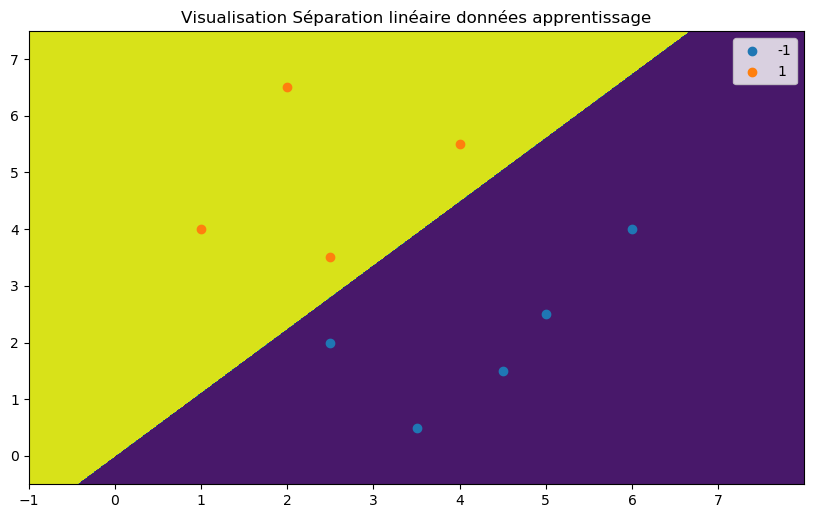

In [16]:
fig, ax = pyplot.subplots(figsize=(10,6), dpi= 100) #figure et axe

Z = Perc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.set_title('Visualisation Séparation linéaire données apprentissage')
ax.contourf(xx, yy, Z)
for value  in [-1,1]:
    idx = np.where(target == value)
    pyplot.scatter(sample[idx, 0], sample[idx, 1],label=value)
ax.legend()
pyplot.show()

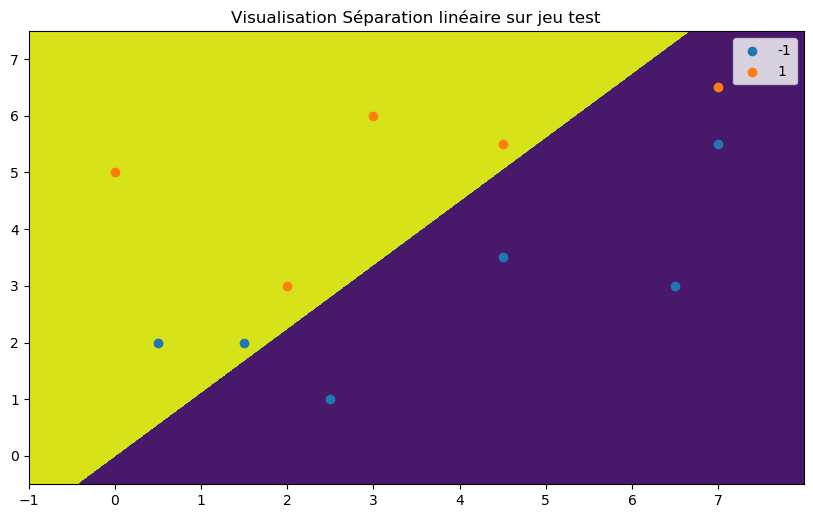

In [17]:
fig, ax = pyplot.subplots(figsize=(10,6), dpi= 100)
ax.set_title('Visualisation Séparation linéaire sur jeu test')
ax.contourf(xx, yy, Z)
#ax.axis('off')
for value  in [-1,1]:
    idx = np.where(t_target == value)
    pyplot.scatter(t_sample[idx, 0], t_sample[idx, 1],label=value)
    
ax.legend()
pyplot.show()

## Complément d'approche

Nous n'avons pas introduit de biais dans le perceptron autrement dit les on calcule 2 coefficients qui multiplient les 2 coordonnées
$$ \left( \begin{array} xx_0 \\ x_1\end{array}\right) \rightarrow sign \left((w_0 , w_ 1 )\left( \begin{array} xx_0 \\ x_1\end{array}\right) \right)$$
La droite de séparation obtenue passe par forcément par (0,0)  

Il est possible d'avoir un bias i.e.

$$ \left( \begin{array} xx_0 \\ x_1\end{array}\right) \rightarrow sign \left((w_0 , w_ 1 )\left( \begin{array} xx_0 \\ x_1\end{array}\right) + b \right)$$

Pour cela on ajoute une coordonnée égale à 1 à nos points 

$$ \left( \begin{array} xx_0 \\ x_1\end{array}\right) \rightarrow \left( \begin{array} xx_0 \\ x_1 \\ 1\end{array}\right) \rightarrow sign \left((w_0 , w_ 1, b)\left( \begin{array} xx_0 \\ x_1 \\ 1\end{array}\right) \right)$$

On cherche maintenant 3 coefficients $(w_0 , w_ 1, b)$.

In [18]:
sample = np.column_stack((sample,np.ones(9)))
t_sample= np.column_stack((t_sample,np.ones(11)))
sample

array([[3.5, 0.5, 1. ],
       [2.5, 2. , 1. ],
       [4.5, 1.5, 1. ],
       [5. , 2.5, 1. ],
       [6. , 4. , 1. ],
       [2.5, 3.5, 1. ],
       [1. , 4. , 1. ],
       [2. , 6.5, 1. ],
       [4. , 5.5, 1. ]])

In [21]:
Perc1 = Perceptron(random_state=0)
Perc1.fit(sample, target)
Perc1.coef_

array([[-9.,  8.,  0.]])

Tout cela pour rien la droite passe toujours par (0,0) !

<hr>
<h2 style="color:#FF0000";>Partie 2 - TP1 bis (Iris de fisher)<\h2>
    
### Préambule

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

## Lecture de données

In [28]:
table = pd.read_csv('iris.csv');table

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Transformons cette table en donnée (numérique) ou label

In [31]:
T=np.array(table) #
X = np.array(T[:,0:4],dtype=float) # seulement les valeurs numérique des 4 colonnes
classes = np.unique(T[:,4]); print(classes)# récupération des nom des classes 

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Dans cette approche on crée 3 perceptrons - autrement dit on veut un réseau avec 4 entrées les "coordonnées" de l'Iris et en sortie 3 indicateurs valant 1 ou -1. 
* Si le premier Perceptron renvoie 1 alors il dit que nous avons Iris-setosa et -1 sinon
* De même le second Perceptron renvoie 1 alors il dit que nous avons Iris-versicolor et -1 sinon
* et même chose pour le troisème

A remarquer que le résultat peut être confus 2 perceptron identifiant chacun le même élément dans un classe différente !

In [44]:
Perc=[Perceptron(),Perceptron(),Perceptron()]

In [45]:
Target[0,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
# Construction de la cible 
target1 = 2*(T[:,4] == classes[0]) -1;
target2 = 2*(T[:,4] == classes[1]) -1;
target3 = 2*(T[:,4] == classes[2]) -1;

Target=[target1,target2,target3]
# Séparation des données entrainement et test
Index=range(150) #on va fonctionner par index
X_train,x_test,Index_train,Index_test = train_test_split(X,Index,test_size=0.30)

On Fit les perceptrons :

In [57]:
for i in [0,1,2]:
    Perc[i].fit(X_train,Target[i][Index_train]);

A l'aide des coefficients calculer on trouve les axes perpendiculaires aux hyperplans

In [58]:
Axe1 =  Perc[0].coef_; Axe1 = Axe1/np.sqrt(Axe1[0,0]**2+Axe1[0,1]**2+Axe1[0,2]**2+Axe1[0,3]**2);
Axe2 =  Perc[1].coef_; Axe2 = Axe2/np.sqrt(Axe2[0,0]**2+Axe2[0,1]**2+Axe2[0,2]**2+Axe2[0,3]**2);
Axe3 =  Perc[2].coef_; Axe3 = Axe3/np.sqrt(Axe3[0,0]**2+Axe3[0,1]**2+Axe3[0,2]**2+Axe3[0,3]**2);
Axes=np.array([Axe1[0,:],Axe2[0,:],Axe3[0,:]]);
print(Axes)

[[ 0.21091156  0.52269387 -0.76111563 -0.32095238]
 [ 0.32509329 -0.78225574  0.20318331 -0.49102633]
 [-0.42319302 -0.37419173  0.65038086  0.50783163]]


On projet et représente dans ce systeme d'axe

In [59]:
Coor = np.ones(3*150).reshape(150,3);
for j in range(3):
    for i in range(150):
        Coor[i,j]= np.dot(X[i,:],Axes[j,:])

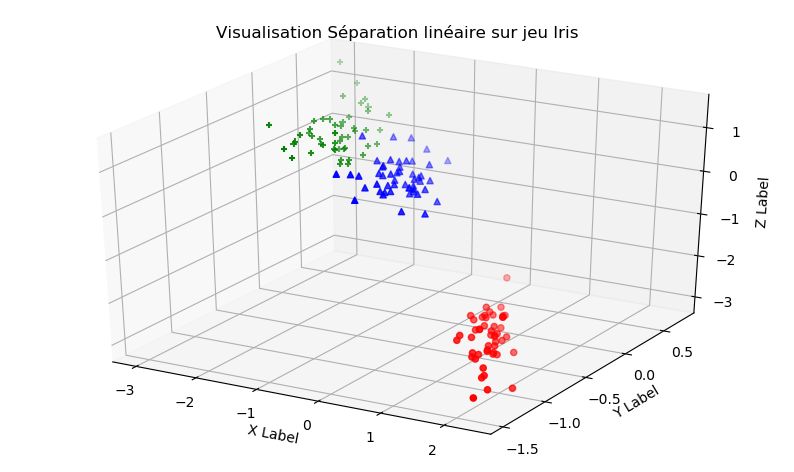

In [60]:
fig = pyplot.figure(figsize=(10,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Visualisation Séparation linéaire sur jeu Iris')
#ax.axis('off')
m=['o','^','+']
c=['r','b','g']
for i  in range(3):
    idx = np.where(Target[i] == 1)
    ax.scatter(Coor[idx, 0], Coor[idx, 1],Coor[idx, 2],marker=m[i],c=c[i])
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
pyplot.show()

### Cacul de la précision par classe sur le jeu de test

In [71]:
Y = [np.ones(len(x_test)),np.ones(len(x_test)),np.ones(len(x_test))]
for i in [0,1,2]:
    Y[i]=Perc[i].predict(x_test);

In [72]:
for i in range(3):
    print('Accuracy {classes[i]}: %.2f' % accuracy_score(Target[i][Index_test], Y[i]))


Accuracy {classes[i]}: 1.00
Accuracy {classes[i]}: 0.67
Accuracy {classes[i]}: 0.93


# 2 eme approche (prise en compte du biais)

(Sans prise d'échantillon ici)

In [73]:
Xn= np.column_stack((X,np.ones(150)))

In [74]:
Percn=[Perceptron(),Perceptron(),Perceptron()]

In [75]:
for i in range(3):
    Percn[i].fit(Xn,Target[i]);

In [76]:
Axe1 =  Percn[0].coef_; Axe1 = Axe1[0,0:4]/np.sqrt(Axe1[0,0]**2+Axe1[0,1]**2+Axe1[0,2]**2+Axe1[0,3]**2);
Axe2 =  Percn[1].coef_; Axe2 = Axe2[0,0:4]/np.sqrt(Axe2[0,0]**2+Axe2[0,1]**2+Axe2[0,2]**2+Axe2[0,3]**2);
Axe3 =  Percn[2].coef_; Axe3 = Axe3[0,0:4]/np.sqrt(Axe3[0,0]**2+Axe3[0,1]**2+Axe3[0,2]**2+Axe3[0,3]**2);

In [77]:
Axes=np.array([Axe1,Axe2,Axe3])

In [78]:
Axes

array([[ 0.10236643,  0.41970234, -0.80869476, -0.39922906],
       [ 0.1513963 , -0.66381453,  0.22855018, -0.69584067],
       [-0.39723382, -0.31171821,  0.61378143,  0.60688501]])

In [79]:
Coor = np.ones(3*150).reshape(150,3);
for j in range(3):
    for i in range(150):
        Coor[i,j]= np.dot(X[i,:],Axes[j,:])

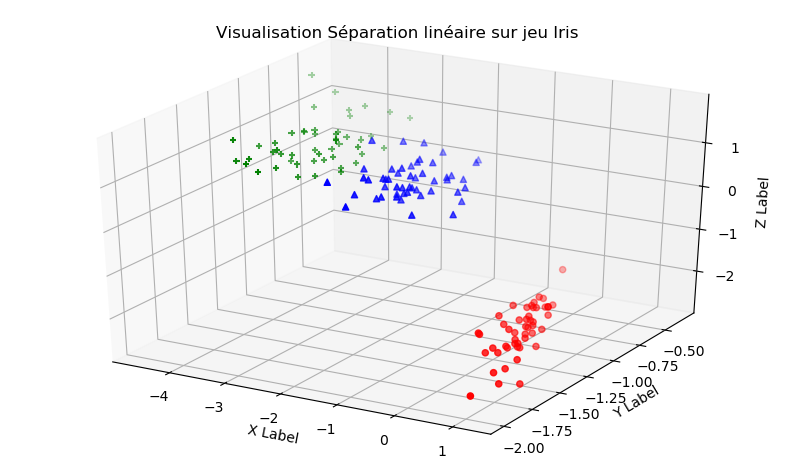

In [80]:
fig = pyplot.figure(figsize=(10,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Visualisation Séparation linéaire sur jeu Iris')
#ax.axis('off')
m=['o','^','+']
c=['r','b','g']
for i  in range(3):
    idx = np.where(Target[i] == 1)
    ax.scatter(Coor[idx, 0], Coor[idx, 1],Coor[idx, 2],marker=m[i],c=c[i])
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
pyplot.show()

In [81]:
Y = [np.ones(150),np.ones(150),np.ones(150)]
for i in [0,1,2]:
    Y[i]=Percn[i].predict(Xn);

In [82]:
for i in range(3):
    print('Accuracy: %.2f' % accuracy_score(Target[i], Y[i]))


Accuracy: 1.00
Accuracy: 0.69
Accuracy: 0.95


<hr>
<h2 style="color:#FF0000";>Partie 3 - TP1 ter (Iris de fisher)<\h2>
    
### Préambule

source : https://www.python-course.eu/neural_networks_with_scikit.php

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

On définit ici une cible à 3 valeurs 0, 1 ou 3 suivant l'espèce 

In [87]:
target = np.ones(150)
for i in range(3):
    idx=np.where(Target[i]==1)
    target[idx]=i

In [88]:
# splitting into train and test datasets
datasets = train_test_split(X,target,test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets

### Normalisation des données

In [89]:
# scaling the data
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[-0.1540467  -0.38221487  0.24635657  0.12393745]
 [-1.22740439  0.09805512 -1.20938678 -1.29864897]
 [-0.1540467  -0.14207987  0.24635657 -0.00538858]]


### Apprentissage

In [90]:
# Training the Model

# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=10000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10000)

In [91]:
predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.975
1.0


In [92]:
print(confusion_matrix(predictions_train, train_labels))

[[41  0  0]
 [ 0 34  0]
 [ 0  3 42]]
